# ML: k Nearest Neighbors

## Content

### kNN

- Blinkit Problem Statement
 - Issue with Logistic Regression

- Geometric Intuition

- The KNN Algorithm

- kNN Scratch Code

- Assumption of KNN

- Sklearn's KNN implementation

- Bias Variance Tradeoff

-  Train and Test Time-Complexity

# **Business Case**

**Blinkit** is trying to find an **optimal number of delivery partners per store** for faster delivery

- Hence it has classified its store into 3 classes based on
 - how much products are delivered from a store

1. Class1 : High Traffic (Needs a high number of delivery partners)
2. Class2 : Moderate Traffic (Needs a decent number of delivery partners)
3. Class3 : Low Traffic (Needs a very small number of delivery partners)

Hence, it's a multiclass classification task.

In [1]:
import pandas as pd
import numpy as np

The below dataset corresponds to a specific warehouse of blinkit in a particular region.

In [2]:
df = pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


**Data Description**

|feature|Description|
|-|-|
|**Region**|where the store is located (1: Tier-1 city, 2: Tier-2 city, 3:Tier-3 city)|
|**Fresh**|Fresh food products delivery count ie. fresh food products sold |
|**Milk**|milk products delivery count|
|**Grocery**|Grocery products delivery count|
|**Frozen**|Frozen food products delivery count|
|**Detergents_Paper**|washing products delivery count|
|**Delicassen**|imported products, cooked meat delivery count|
|**class**|Store catgeory (Class1, Class2, Class3)|

In [3]:
df.shape

(440, 8)

In [4]:
# Defining X and Y for the model
X=df[['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].copy()
y=df[['class']].copy()
X.shape, y.shape

((440, 7), (440, 1))

In [5]:
y['class'].value_counts()

2    180
3    173
1     87
Name: class, dtype: int64

There's a bit of imbalance here. We'll work it out in a bit.

PCA can be used to reduce the dimension of the data. (dimensionality reduction)<br>
It would be different to visualize(do scatterplot) these 7 features using this 2-D notebook.<br>
So, just for visualization purpose, we have used PCA to transform this data to two components. (two dimensions)

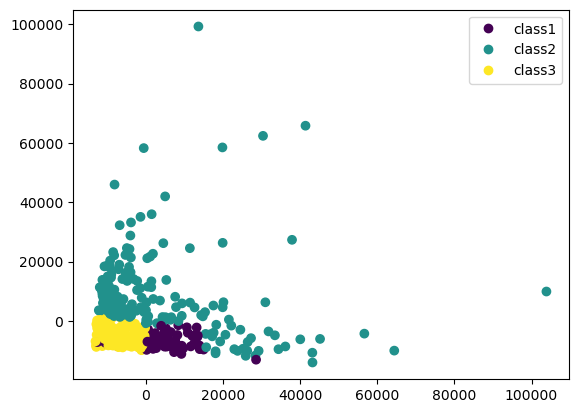

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
visualize = pca.fit_transform(X)

def scatter_visualize(visualize1, visualize2, y_label):
    scatter = plt.scatter(visualize[:,0], visualize[:,1], c = y_label)  # c = sequence of n numbers to be mapped to colors
    #  Each legend handle is a `.Line2D` representing the Path that was drawn,
    #  and each label is a string what each Path represents.
    plt.legend(handles = scatter.legend_elements()[0], labels = ['class1', 'class2', 'class3']) # giving labels for each legend element
    plt.show()

scatter_visualize(visualize[:,0], visualize[:,1], y.values[:,0])

We have three classes and the model would have non-linear decision boundaries.

Summary:<br>
- We're supposed to do multi-class classification<br>
- We're gonna have non-linear decision boundary
    
Potential ways to solve this:<br>
- Polynomial LogReg OVR(one vs rest) setting<br>
- ANN(artificial neural networks) --> DL technique, requires a lot of data

Polynomial LogReg:<br>
1. Manual Feature Engineer needed<br>
2. Multiple LogReg training needed (If it's a 50 class classification dataset, you will have to train 50 separate LogReg models.)

KNN:<br>
can work:
- with less data
- multiclass in default version
- Learn very complex decision boundaries

### Scratch code implemention of kNN

In [7]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# We need validation data when we have hyperparameters. Here, we have k.

# During the development process, the training set is used to train the model, 
# while the validation set is used to evaluate the model's performance and tune hyperparameters. 
# By iteratively adjusting the hyperparameters and assessing the model's performance on the 
# validation set, you can find the combination of hyperparameters that yields the best results.

# The test set, on the other hand, is reserved for the final evaluation of the model's performance 
# once all the hyperparameter tuning and model development are completed. It provides an unbiased 
# estimate of the model's generalization performance on unseen data.

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.20, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(281, 7) (281, 1)
(71, 7) (71, 1)
(88, 7) (88, 1)


In [8]:
# Here's the split explained:
print(f'train_val: {440*.8}, test:{440*.2}, train_val further divided into: train: {(440*.8)*.8}, val:{(440*.8)*.2}')

train_val: 352.0, test:88.0, train_val further divided into: train: 281.6, val:70.4


In [9]:
print(f"Validation data gets: {80 * .2}% of the 80% of the original data")

Validation data gets: 16.0% of the 80% of the original data


##### SMOTE to bring some balance to the classes

In [10]:
# pip install imbalanced-learn

In [11]:
from imblearn.over_sampling import SMOTE
# Create an instance of SMOTE
smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)
# Q - Do I balance my test and val dataset? No, we are balancing the dataset only for healthy learning

In [12]:
y_sm.value_counts()

class
1        115
2        115
3        115
dtype: int64

Before you start performing any kind of training, you must standardize your features as well

In [13]:
from sklearn.preprocessing import StandardScaler
# making mean = 0 and std = 1
st = StandardScaler()

X_sm = st.fit_transform(X_sm.values)
X_val_scaled = st.transform(X_val.values)
X_test_scaled = st.transform(X_test.values)

y_sm = y_sm.values[:,0]
y_val = y_val.values[:,0]
y_test = y_test.values[:,]

In [14]:
X_sm

array([[-1.70887607, -0.93416006,  0.24392366, ..., -0.39590791,
         0.32274005, -0.01694166],
       [-0.48571789, -0.25567087, -0.46156887, ...,  0.11954485,
        -0.51174446, -0.15942596],
       [-0.48571789, -0.31418515, -0.44682406, ..., -0.06106406,
        -0.50245446, -0.13595796],
       ...,
       [-0.48571789, -0.45710743, -0.49796596, ..., -0.44844485,
        -0.53395968, -0.31934363],
       [-0.48571789, -0.22553832, -0.49584058, ...,  1.12914021,
        -0.46569837, -0.35253409],
       [-0.48571789, -0.4555409 , -0.29153866, ...,  2.09400533,
        -0.40288988, -0.08466361]])

Let's take one query point from validation dataset:

In [15]:
X_val_scaled[50] # picking any random query point

array([ 0.7374403 ,  1.41323007, -0.20081161, -0.07313881,  0.31133632,
       -0.42672075,  0.33004951])

Notice that we're not using the PCA data. PCA data was just to understand what the problem is. But, we're working with original dataset.

Now, we have to calculate the distance of this point from all the points available in X_sm which is the SMOTE dataset.

In [16]:
# Euclidean distance formula: d = sqrt((x2 - x1)^2 + (y2 - y1)^2). 
# Here x2 and y2 are from X_sm(ith) which has elements -> [x2, y2..], x1 and y1 are from X_val_scaled[50] -> which has [x1,y1..]
dist = np.sqrt(np.sum((X_sm - X_val_scaled[50]) ** 2, axis = 1)) # horizontal sum
dist.shape  # The shape is larger as we used SMOTE earlier

(345,)

In [17]:
# append ground truth class with distance
distances = [(dist[i], y_sm[i]) for i in range(len(dist))]

In [18]:
nn = sorted(distances)[:5]
nn

[(0.8319361429779233, 1),
 (0.9281151977404027, 2),
 (0.9549143974895783, 2),
 (0.9729760001389008, 1),
 (0.9894400495816682, 1)]

In [19]:
class_counts = np.unique(np.array(nn)[:,1], return_counts = True)
class_counts

(array([1., 2.]), array([3, 2], dtype=int64))

1st array has the class labels, the second array has the corresponding value_counts

In [20]:
# class which has the max count
class_counts[0][class_counts[1].argmax()]

1.0

Formulating into one function:

In [21]:
# it has k as a hyperparameter
def knn(X,Y,queryPoint,k):
    """Predict the class label for the query point"""
    # Euclidean Distance
    dist = np.sqrt(np.sum((queryPoint-X)**2,axis=1) )

    # Storing distance and Class labels together
    distances = [(dist[i],Y[i]) for i in range(len(dist)) ]
    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]

    distances = np.array(distances)

    classes_counts = np.unique(distances[:,1],return_counts=True)

    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]

    return int(pred),distances

In [22]:
pred, neighbors = knn(X_sm, y_sm, X_val_scaled[30], 6)

In [23]:
pred

1

In [24]:
neighbors

array([[1.72036472, 1.        ],
       [1.8688995 , 2.        ],
       [2.01252471, 1.        ],
       [2.17123344, 1.        ],
       [2.2385283 , 1.        ],
       [2.27097477, 1.        ]])

We are not doing any hyperparameter tuning. We have assumed that k = 5.
<br>So, we can run it for the test dataset instead of validation. Leter, we'll do the hyperparameter tuning.

In [25]:
y_pred = []
for i in range(X_test_scaled.shape[0]):
    output, _ = knn(X_sm, y_sm, X_test_scaled[i], 5)
    y_pred.append(output)

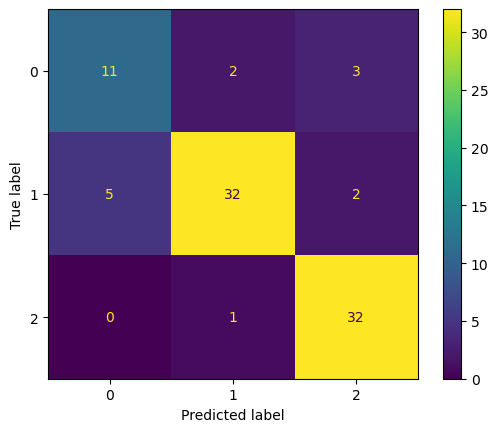

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot()

Most of the big values are across the diagonal. 
<br>There are only little misclassifications.<br>
class 0 has 4 misclassifications<br>
class 1 has 9 misclassifications<br>
class 2 has 2 misclassifications

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.69      0.69      0.69        16
           2       0.82      0.91      0.86        35
           3       0.97      0.86      0.91        37

    accuracy                           0.85        88
   macro avg       0.83      0.82      0.82        88
weighted avg       0.86      0.85      0.85        88



Support here for class 1 means how many samples has my model predicted as class 1

If we look at class 1(purple) class, it's surrounded by both the classes and it has very less data points. Hence, performance for class 1 is not that great

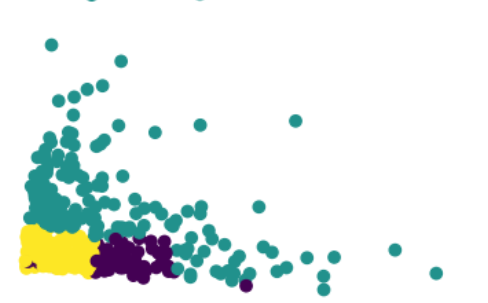

oversampling improved the performance a little bit. Without oversampling, the performance may have been far worse.<br>
But, it has a limitation since it's only synthetic data. Otherwise, companies won't be selling data if they could get good results like these with synthetic data.

Summary:
- First train the model without any sampling/class balancing.
- Perform undersampling, oversampling and SMOTE.
- Then, create a benchmark as to how it was performing before sampling and after sampling.

### kNN sklearn Implementation:

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean') # creating an object

knn.fit(X_sm, y_sm)

knn.score(X_val_scaled, y_val) # accuracy

0.9014084507042254

`accuracy = (number of correct predictions) / (total number of predictions)`

**Why fit when there's no training happening?**<br>
In scikit-learn, the fit() method is used to train (fit) a machine learning model with the provided data. While it's true that the k-nearest neighbors (KNN) algorithm doesn't involve a traditional training step like other models, scikit-learn still requires you to call the fit() method to perform necessary internal computations and store the provided data for future use.

In the case of KNN, the fit() method stores the training data (X_sm and y_sm) internally so that it can be used later for making predictions. During the fitting process, KNN algorithm computes and stores the necessary information from the training data, such as the distance metrics, to find the nearest neighbors during the prediction phase.

In [30]:
y_pred = knn.predict(X_val_scaled)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.68      1.00      0.81        15
           2       1.00      0.85      0.92        26
           3       1.00      0.90      0.95        30

    accuracy                           0.90        71
   macro avg       0.89      0.92      0.89        71
weighted avg       0.93      0.90      0.91        71



### Bias-Variance Trade Off in kNN

In [31]:
acc = []

# Calculating error for K values between 1 and 50
# Note: 51 is not included in the loop
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_sm, y_sm)

    acc.append(knn.score(X_val_scaled,y_val))

Visualizing the error and K values

Text(0, 0.5, 'Accuracy')

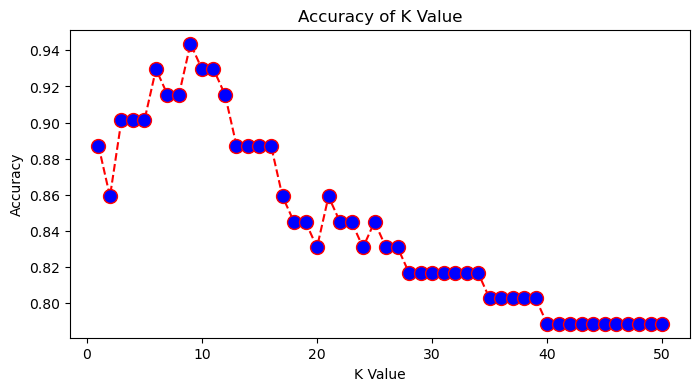

In [33]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 51), acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

**observe**

From this accuracy plot, it is clear that:
- Highest accuracy attained when $k = 9$

- Meaning our intial kNN is the best model (if k = 9)

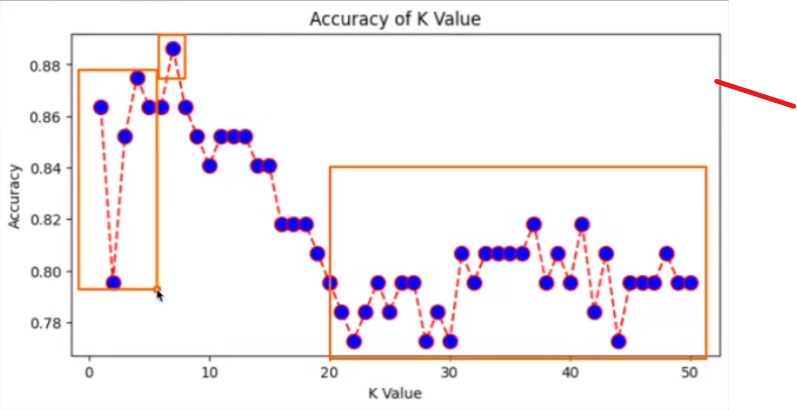

The region on the left is overfitted and the region on the right is underfitted.

In [34]:
best_k = np.argmax(acc) + 1
best_k

9

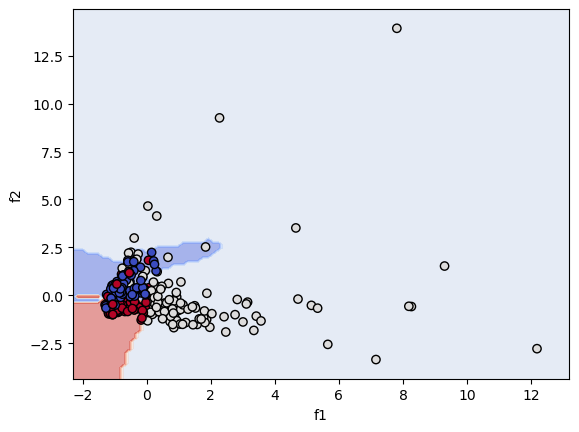

In [35]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

# Choosing the first 2 columns for the plot
pca = PCA(n_components=2)
X_train_cols = pca.fit_transform(X_sm)

# Creating and fitting the classifier

classifier = KNeighborsClassifier(n_neighbors=9,metric='euclidean')    # setting k = 9

classifier.fit(X_train_cols, y_sm)

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(classifier,
                                              X_train_cols,
                                              response_method="predict",
                                              xlabel='f1', ylabel='f2',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

# Plotting the data points
disp.ax_.scatter(X_train_cols[:, 0], X_train_cols[:, 1],
                 c=y_sm, edgecolor="k",
                 cmap=plt.cm.coolwarm)


plt.show()

By specifying the response_method as "predict", the class labels are obtained from the classifier's predict method. The xlabel and ylabel parameters are used to label the x-axis and y-axis of the decision boundary plot, respectively.

classifier: It refers to the trained classifier model that you want to visualize the decision boundaries for.

X_train_cols: It represents the feature columns of your training dataset. The decision boundaries will be plotted based on these features.

response_method: It specifies the method used to obtain the predicted class labels from the classifier. In this case, "predict" method is used to get the predicted labels.

xlabel and ylabel: These parameters specify the labels for the x-axis and y-axis of the decision boundary plot, respectively.

alpha: It controls the transparency level of the decision boundaries. The value 0.5 indicates a medium level of transparency.

cmap: It specifies the colormap to be used for the decision boundary plot. Here, plt.cm.coolwarm colormap is used, which represents the decision regions with cool (blue) and warm (red) colors.

The DecisionBoundaryDisplay class allows you to visualize how the classifier separates different classes in the feature space. It can be useful for understanding the decision boundaries and evaluating the performance of the classifier.

**DecisionBoundaryDisplay class**<br><br>
The DecisionBoundaryDisplay class in scikit-learn provides a way to visualize decision boundaries by creating a grid of points in the feature space and assigning class labels to those points based on the trained classifier.

Here's a high-level overview of how the decision boundaries are created:

Generate a grid of points: The feature space is divided into a grid of points that cover the entire range of feature values. These points form a dense grid or mesh, allowing us to visualize the decision boundaries.

Assign class labels to grid points: Each point in the grid is then classified using the trained classifier. The classifier predicts the class label for each point based on its feature values.

Plotting the decision boundaries: The grid points are plotted on a graph, where each point is colored according to its predicted class label. The decision boundaries are determined by the regions where the predicted class labels change.

### Time and Space Complexity of kNN algorithm

Training complexity:<br>
TC: O(1)<br>
SC: m*d<br>

Testing complexity:<br>
TC: m*d + m(logm)<br>
SC: storing the distances -> O(m)

<strong>If you have any questions, connect with me here:</strong> <br>
[LinkedIn](https://www.linkedin.com/in/khushalkumar/) <br>
[Instagram](https://www.instagram.com/khushalkumar/)